# Extracting Information from Music Signals 
## Sinusoids (Session 1.7) - Kadenze 
### George Tzanetakis, University of Victoria 

In this notebook we will explore sinusoids as basic abstract building blocks of music. First we look into how to create a sinusoidal signal of a particular duration and frequency with discrete samples at a specified sampling rate. Then we will hear and view the resulting signals in different ways. Simple recognizable melodies can be created from these 
very simple individual sinusoidal signals by appropriately setting their durations and frequencies. In the first cell below we setup things and load some Python modules that we will use for plotting and playing audio. 


In [1]:
import numpy as np
import IPython.display as ipd

%matplotlib notebook 
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

Let's create a sinusoid with a frequency of 220Hz at the audio rate of 44100 samples per second and then listen to it. The variable $t$ is an array containing the time instances in seconds that correspond to each sample. We generate 5 seconds of audio by evaluating the appropriate sine function (np.sin) for each of these time instances. The last line of the cell displays a small audio player that allows us to hear the generated sinsuoidal sound wave. 

In [17]:

srate = 44100      # sampling rate 
duration = 1       # duration in seconds 
freq = 12000         # frequency 


t = np.linspace(0,duration,srate*duration)     # time instances of samples 
data =  np.sin(2*np.pi*freq*t);                # audio samples 

# play the corresponding audio 
ipd.Audio(data,rate=srate)

In [6]:
t = np.linspace(0, 1, 100)
t

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [21]:
3 * 60 * ((44100 * 2 * 16 / 8) / 1024)


31007.8125

We can abstract the generation of a sinusoidal signal of a particular amplitude, frequency and phase by writing a function that also takes a duration in seconds as an argument. This function can be used to view plots of sinusoidal signals and listen to them without having to repeat the code used for the generation of samples. 


In [23]:
# generate a discrete time sine signal with a specified amplitude, frequency, duration, and 
# phase 
def sinusoid(freq=440.0, dur=1.0, srate=44100.0, amp=1.0, phase = 0.0): 
    t = np.linspace(0,dur,int(srate*dur))
    data = amp * np.sin(2*np.pi*freq *t+phase)
    return data

data = sinusoid(freq=220, dur=2.0)
ipd.Audio(data,rate=srate)


Now let's look at a plot of our signal. In order to visualize what is happening we will view 0.01 seconds or 10 milliseconds of audio signal so that we can see the time domain waveform better. A sinusoidal signal is characterized by three numbers: the amplitude, the frequency, and the phase. The following interactive plot will show the effect of changing these values using sliders.  

<IPython.core.display.Javascript object>


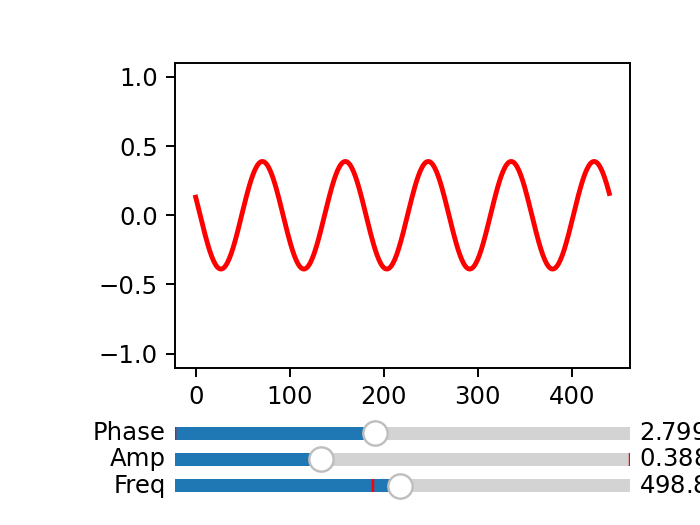

0

In [24]:
# plot initial signal 
fig, ax = plt.subplots(figsize=(4,3))
plt.subplots_adjust(left=0.25, bottom=0.30)
l, = plt.plot(sinusoid(freq=440, dur =0.01, amp=1.0), lw=2, color='red')

# create sliders 
axcolor = 'lightgoldenrodyellow'
axamp = plt.axes([0.25, 0.1, 0.65, 0.05], facecolor=axcolor)
axfreq = plt.axes([0.25, 0.05, 0.65, 0.05], facecolor=axcolor)
axphase = plt.axes([0.25, 0.15, 0.65, 0.05], facecolor=axcolor)
samp = Slider(axamp, 'Amp', 0.1, 1.0, valinit=1.0)
sfreq = Slider(axfreq, 'Freq', 10.0, 1000.0, 440)
sphase = Slider(axphase, 'Phase', (2*np.pi) / 100.0, 2 * np.pi, 0)

# the udpate function is called when the slider values changes 
# the plot is redrawn to reflect the new values 
def update(val):
    amp = samp.val
    freq = sfreq.val
    phase = sphase.val
    l.set_ydata(sinusoid(freq=freq,dur = 0.01, amp=amp, phase=phase))
    fig.canvas.draw_idle()
    
# connect the update function with the sliders 
sfreq.on_changed(update)
samp.on_changed(update)
sphase.on_changed(update)

By concatenating appropriate sinusoidal signals we can generate a simple melody. 

In [25]:
# frequencies of three notes (C, D, E) 
c_freq = 523.0   
d_freq = 587.0  
e_freq = 659.0 

# generate sine signals corresponding to each note 
c_data = sinusoid(c_freq, 0.5)
d_data = sinusoid(d_freq, 0.5)
e_data = sinusoid(e_freq, 0.5)

# form a simple melody by concateneting the signal arrays for each note 
data = np.hstack([c_data, d_data, e_data, c_data, c_data, d_data, e_data, c_data])
ipd.Audio(data,rate=srate)

Now let's see what happens if we play the sine waves simultanesouly.  

In [26]:
data = np.vstack([c_data, d_data, e_data])
data = np.sum(data, axis=0)
ipd.Audio(data,rate=srate)


What if we change a little bit the frequencies so that they are multiples of the first frequency ? 

In [27]:
freq1 = 220.0 
freq2 = 440.0 
freq3 = 660.0 
freq4 = 880.0 

data_f1 = sinusoid(freq1, 0.5, amp=3.0)
data_f2 = sinusoid(freq2, 0.5, amp =3)
data_f3 = sinusoid(freq3, 0.5)
data_f4 = sinusoid(freq4, 0.5)

data = np.hstack([data_f1, data_f2, data_f3, data_f4])
ipd.Audio(data,rate=srate)

Now let's hear them simultaneously. Notice how it now sounds like a single note. This is because the underylying frequencies are multiples of each other (known as harmonics) and our auditory system perceives them as a single note. 

In [28]:
data = np.vstack([data_f2, data_f3, data_f4])
data = np.sum(data, axis=0)
ipd.Audio(data,rate=srate)

To summarize, we are able to create simple but recognizable music pieces by combining discrete sinusoidal signals through concatenation and addition. A sinusoid is fully characterized by three numbers amplitude, frequency, and phase. 